In [ ]:
import pandas as pd
import numpy as np

!gdown 1iAUszAI2cdJLOlrLr2zW4pFCww-743cN
!gdown 1sLSdBfh_91PvP85-TBjUFGbxm6x7Wc8E
!gdown 19q8pOP8r0ssI8_jNWoJt2-sIRZrFaW0F
!gdown 1o4KI7RsVwzYbWpON6sDJhe93vuwAsKRz

Downloading...
From: https://drive.google.com/uc?id=1iAUszAI2cdJLOlrLr2zW4pFCww-743cN
To: /content/tr_mcc_codes.csv
100% 14.9k/14.9k [00:00<00:00, 20.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sLSdBfh_91PvP85-TBjUFGbxm6x7Wc8E
To: /content/tr_types.csv
100% 14.2k/14.2k [00:00<00:00, 18.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=19q8pOP8r0ssI8_jNWoJt2-sIRZrFaW0F
To: /content/transactions.csv
100% 314M/314M [00:01<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o4KI7RsVwzYbWpON6sDJhe93vuwAsKRz
To: /content/gender_train.csv
100% 99.9k/99.9k [00:00<00:00, 76.1MB/s]


## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [ ]:
tr_mcc_codes = pd.read_csv(filepath_or_buffer = "/content/tr_mcc_codes.csv", sep = ';')
tr_types = pd.read_csv(filepath_or_buffer = "/content/tr_types.csv", sep = ';')
transactions = pd.read_csv(filepath_or_buffer= "/content/transactions.csv", sep = ',', nrows=1000000)
gender_train = pd.read_csv(filepath_or_buffer= "/content/gender_train.csv", sep = ',')

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
sampled_data = transactions['tr_type'].sample(n=1000)

search_condition = tr_types['tr_description'].str.contains('|'.join(['POS', 'АТМ']))
data_with_substrings = tr_types['tr_type'][search_condition]

tr_subs_amount = sampled_data.isin(data_with_substrings).value_counts()[True]

print(f"{tr_subs_amount / 1000 * 100}%")

63.1%


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
popular_types = transactions['tr_type'].value_counts().sort_values(ascending=False).head(n=10)
top_ten = tr_types[tr_types['tr_type'].isin(popular_types.index)]

top_ten

,tr_type,tr_description
39,7010,Взнос наличных через АТМ (в своем тер.банке)
47,7030,Перевод на карту (с карты) через АТМ (в предел...
59,7070,Перевод на карту (с карты) через Мобильный бан...
60,7071,Перевод на карту (с карты) через Мобильный бан...
98,1010,Покупка. POS ТУ СБ РФ
99,1030,Оплата услуги. Банкоматы СБ РФ
100,1100,Покупка. ТУ Россия
101,1110,Покупка. POS ТУ Россия
106,2010,Выдача наличных в АТМ Сбербанк России
129,2370,Списание с карты на карту по операции <перевод...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
data = transactions[['customer_id', 'amount']]

In [ ]:
# Срез клиентов с приходом на карту
data_pos = data[data.amount > 0]
sorted_pos = data_pos.groupby(['customer_id']).sum().sort_values('amount', ascending=False)
sum_max_pos = sorted_pos.amount.max()
customer_pos_id = sorted_pos.amount.idxmax()

customer_pos_id

70780820

In [ ]:
# Срез клиентов с расходами по карте
data_neg = data[data.amount < 0]
sorted_neg = data_neg.groupby(['customer_id']).sum().sort_values('amount')
sum_min_neg = sorted_neg.amount.min()
customer_neg_id = sorted_neg.amount.idxmin()

customer_neg_id

70780820

In [ ]:
print(abs(sum_max_pos + sorted_neg.loc[customer_neg_id][0]))
print(abs(sum_min_neg + sorted_pos.loc[customer_pos_id][0]))

1837317.980000019
1837317.980000019


## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
groupped_trans = transactions[transactions['tr_type'].isin(top_ten['tr_type'])].groupby('tr_type')
mean = pd.Series(groupped_trans['amount'].mean(), name="Mean")
median = pd.Series(groupped_trans['amount'].median(), name="Median")
pd.concat([mean, median], axis=1)

,Mean,Median
tr_type,,
1010,-19784.748640,-7411.52
1030,-5320.980222,-2245.92
1100,-44061.827262,-10188.26
1110,-32119.330371,-11207.57
2010,-136077.629325,-44918.32
2370,-205418.249032,-44918.32
7010,276391.789596,112295.79
7030,86104.332909,13951.52
7070,65569.831700,11319.42


In [ ]:
groupped_trans = transactions.loc[transactions['customer_id'] == customer_neg_id].groupby('tr_type')
mean = pd.Series(groupped_trans['amount'].mean(), name="Mean")
median = pd.Series(groupped_trans['amount'].median(), name="Median")
pd.concat([mean, median], axis=1)

,Mean,Median
tr_type,,
2010,-2.941056e+06,-3368873.660
2330,-2.382398e+06,-2245915.770
2370,-2.218505e+06,-2245915.770
6110,1.756293e+04,10028.010
7020,1.465129e+04,10319.985
7021,2.850067e+04,28500.670
7030,1.406196e+04,8848.910
7031,1.921036e+04,12992.620
7034,1.430648e+04,14306.480


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
abs(transactions[transactions['amount'] < 0].groupby('gender')['amount'].mean().diff()[1])

32718.054920224655

In [ ]:
abs(transactions[transactions['amount'] > 0].groupby('gender')['amount'].mean().diff()[1])

63366.57104801464

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
exp = transactions[transactions['amount'] < 0].groupby(['gender', 'mcc_code'])['amount'].sum()
pd.DataFrame(exp)

amount
gender mcc_code             
0.0    742        -386207.68
       1711       -674897.69
       1799       -261626.73
       2741        -20746.42
       3000     -74431645.27
...                      ...
1.0    8999     -28643346.63
       9222       -988205.17
       9311       -373271.22
       9399      -1810820.67
       9402         -4581.67

[349 rows x 1 columns]

In [ ]:
data = abs(exp[0] - exp[1]).sort_values(ascending=False).head(n=10)
categories = tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(data.index)]
categories

,mcc_code,mcc_description
22,4829,Денежные переводы
62,5511,"Легковой и грузовой транспорт — продажа, серви..."
64,5533,Автозапчасти и аксессуары
65,5541,Станции техобслуживания
75,5661,Обувные магазины
90,5812,"Места общественного питания, рестораны"
116,5977,Магазины косметики
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...
162,7995,Транзакции по азартным играм


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

## Ответ на задание (old)

In [ ]:
transactions = pd.read_csv(filepath_or_buffer= "/content/transactions.csv", sep = ',', nrows=1000000)
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')

Оставьте в датафрейме только тех клиентов, которые совершили более 100 транзакций.

In [ ]:
f = lambda x: x['mcc_code'].count() > 100
transactions[['customer_id', 'mcc_code']].groupby(['customer_id']).filter(f)

,customer_id,mcc_code
0,39026145,4814
1,39026145,4814
2,39026145,4814
3,39026145,4814
4,39026145,4814
...,...,...
999579,36837532,3000
999580,6808459,3000
999581,83759123,3000
999582,89619970,3000


Оставьте в датафрейме только транзакции по категориям из ответа к заданию 7.


In [ ]:
data = transactions[['customer_id', 'gender', 'tr_type', 'tr_description', 'mcc_code', 'mcc_description', 'amount']]
trans_data = data[data['mcc_code'].isin(categories['mcc_code'])]
trans_data[['customer_id', 'mcc_code']]

,customer_id,mcc_code
120373,20297899,4829
120374,34124149,4829
120375,34124149,4829
120376,34124149,4829
120377,34124149,4829
...,...,...
998323,20297899,7995
998324,20297899,7995
998325,20297899,7995
998326,5577042,7995


Постройте для каждого пола диаграмму, на которой показано распределение их трат по этим категориям.

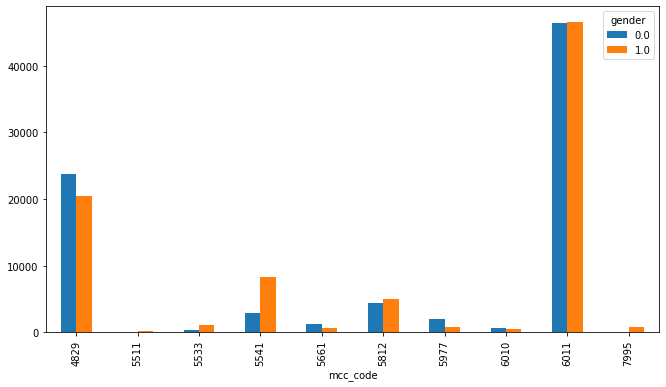

In [ ]:
gender_data = trans_data[trans_data['amount'] < 0]

amount = gender_data.groupby(['gender', 'mcc_code'])['amount'].count().unstack('gender')
amount.plot(legend=True, kind='bar', figsize=(11,6))

Предположите, какой пол кодируется числом 0.

In [ ]:
data = data[['mcc_code', 'mcc_description']]
data[(data['mcc_code'] == 5541)].groupby(['mcc_code', 'mcc_description']).size()

mcc_code  mcc_description        
5541      Станции техобслуживания    20522
dtype: int64

*Женский*

## Ответ на задание (10 октября)

В задании 5 вы считали разницу в тратах между мужчинами и женщинами во все дни. А в какие дни эта разница максимальна? Выведите 5 номеров дней. В каких категориях совершались траты в эти дни? Выведите описание этих категорий

In [ ]:
data = transactions[['mcc_code', 'tr_datetime', 'amount', 'gender', 'mcc_description']]
data[["tr_day", "tr_time"]] = data["tr_datetime"].str.split(" ", expand=True)

groups_gender = data[data.amount < 0].groupby(['gender', 'tr_day'])['amount'].sum()
diff = abs(groups_gender[0] - groups_gender[1])
diff = diff.sort_values(ascending=False).head(5).to_frame()
diff

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,amount
tr_day,
143,1.933850e+08
151,1.561498e+08
144,5.788518e+07
43,5.784510e+07
6,5.257798e+07


In [ ]:
data = data[data['tr_day'].isin(diff.index)]
data = data.groupby(['tr_day', 'mcc_code', 'mcc_description']).size().sort_values(ascending=False)
data.groupby('tr_day').head(10).sort_index().to_frame()

0
tr_day mcc_code mcc_description                                        
143    4814     Звонки с использованием телефонов, считывающих ...  260
       4829     Денежные переводы                                   167
       5331     Универсальные магазины                               20
       5411     Бакалейные магазины, супермаркеты                   293
       5499     Различные продовольственные магазины — рынки, м...   91
       5541     Станции техобслуживания                              26
       5812     Места общественного питания, рестораны               40
       5912     Аптеки                                               41
       6010     Финансовые институты — снятие наличности вручную    420
       6011     Финансовые институты — снятие наличности автома...  397
144    4814     Звонки с использованием телефонов, считывающих ...  257
       4829     Денежные переводы                                   211
       5411     Бакалейные магазины, супермаркеты                   268
       5499     Различные продовольственные магазины — рынки, м...   87
       5541     Станции техобслуживания                              42
       5812     Места общественного питания, рестораны               37
       5814     Рестораны, закусочные                                24
       5912     Аптеки                                               43
       6010     Финансовые институты — снятие наличности вручную    412
       6011     Финансовые институты — снятие наличности автома...  456
151    4814     Звонки с использованием телефонов, считывающих ...  320
       4829     Денежные переводы                                   233
       5331     Универсальные магазины                               38
       5411     Бакалейные магазины, супермаркеты                   430
       5499     Различные продовольственные магазины — рынки, м...  120
       5541     Станции техобслуживания                              48
       5912     Аптеки                                               52
       5977     Магазины косметики                                   29
       6010     Финансовые институты — снятие наличности вручную    374
       6011     Финансовые институты — снятие наличности автома...  596
43     4814     Звонки с использованием телефонов, считывающих ...  237
       4829     Денежные переводы                                   114
       5331     Универсальные магазины                               35
       5411     Бакалейные магазины, супермаркеты                   252
       5499     Различные продовольственные магазины — рынки, м...   82
       5541     Станции техобслуживания                              41
       5912     Аптеки                                               41
       5921     Магазины с продажей спиртных напитков на вынос ...   23
       6010     Финансовые институты — снятие наличности вручную    106
       6011     Финансовые институты — снятие наличности автома...  444
6      4814     Звонки с использованием телефонов, считывающих ...  255
       4829     Денежные переводы                                   105
       5411     Бакалейные магазины, супермаркеты                   255
       5499     Различные продовольственные магазины — рынки, м...   84
       5541     Станции техобслуживания                              45
       5812     Места общественного питания, рестораны               43
       5814     Рестораны, закусочные                                27
       5912     Аптеки                                               23
       6010     Финансовые институты — снятие наличности вручную    281
       6011     Финансовые институты — снятие наличности автома...  495